# Kainų vizualizacija

In [39]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer 
reviews = pd.read_csv('data/winereviewscsv.csv', index_col=0)

In [40]:
reviews[reviews.duplicated('description',keep=False)].sort_values('description').head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
67614,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
119702,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
72181,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
73731,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie


In [41]:
reviews = reviews.drop_duplicates('description')
reviews = reviews[pd.notnull(reviews.price)]
reviews.shape

(111567, 13)

Pearson Correlation: (0.4165661551799582, 0.0)
                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.431
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                          8.455e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                        0.00
Time:                        22:04:02   Log-Likelihood:                     -6.2696e+05
No. Observations:              111567   AIC:                                  1.254e+06
Df Residuals:                  111566   BIC:                                  1.254e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0

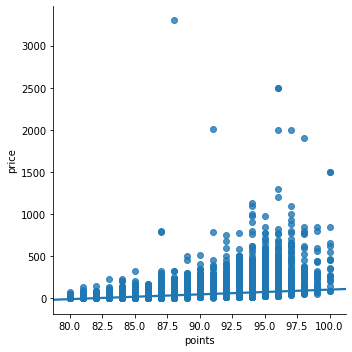

In [42]:
from scipy.stats import pearsonr
import statsmodels.api as sm
print("Pearson Correlation:", pearsonr(reviews.price, reviews.points))
print(sm.OLS(reviews.points, reviews.price).fit().summary())
sns.lmplot(y = 'price', x='points', data=reviews)

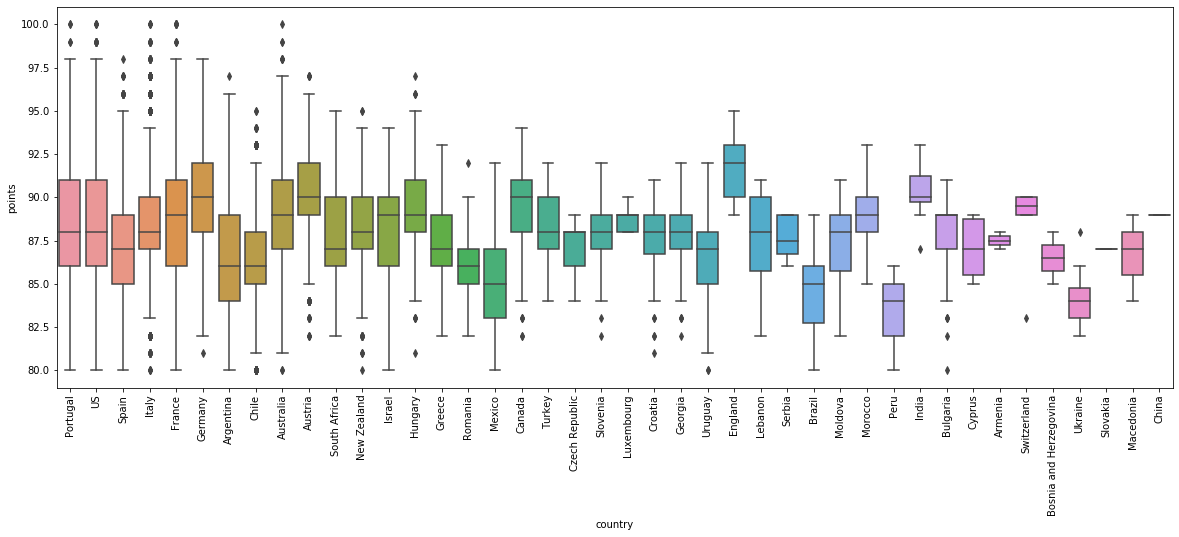

In [43]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=reviews, ax = ax)
plt.xticks(rotation = 90)
plt.show()

# Vyno kainos skirtingose šalyse

In [44]:
z=reviews.groupby(['country'])['price','points'].mean().reset_index().sort_values('price',ascending=False)
z[['country','price']].head(n=10)

,country,price
37,Switzerland,72.833333
13,England,52.677966
16,Germany,43.460789
18,Hungary,42.234375
14,France,41.994105
21,Italy,39.928027
39,US,36.697346
7,Canada,35.776786
2,Australia,35.686491
20,Israel,31.770419


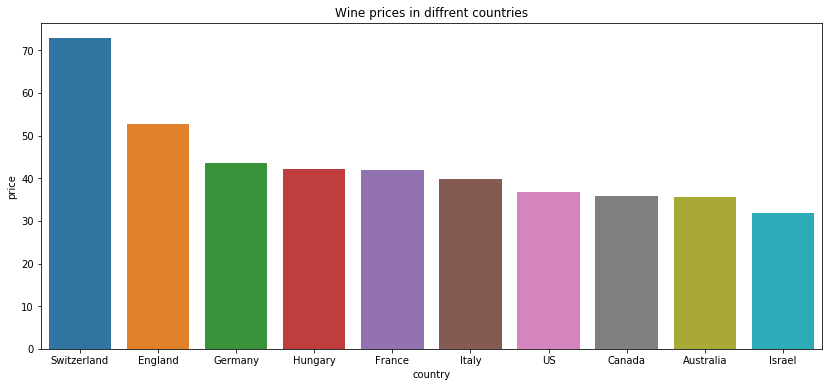

In [45]:
plt.figure(figsize = (14,6))
plt.title('Wine prices in diffrent countries')
sns.barplot(x = 'country', y="price", data=z.head(10))
locs, labels = plt.xticks()
plt.show()

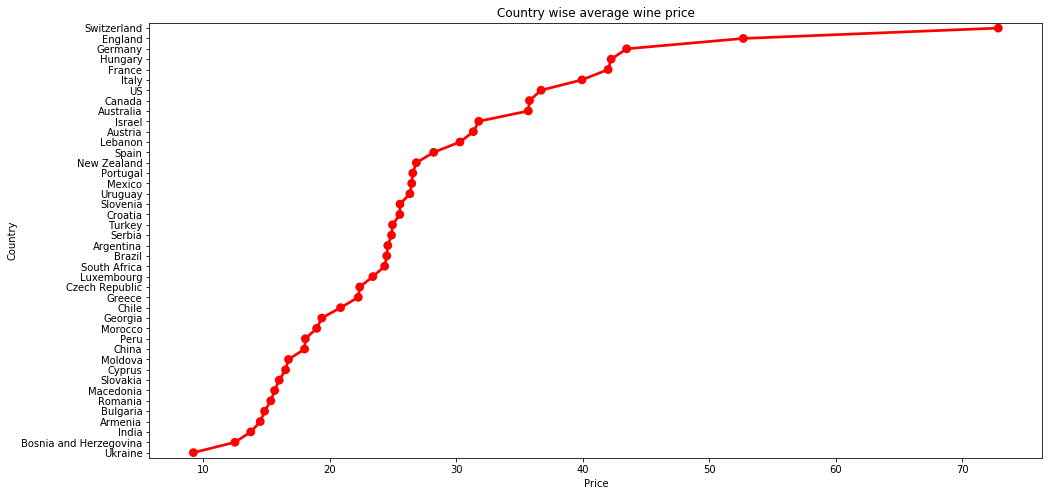

In [46]:
cnt = reviews.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='r',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

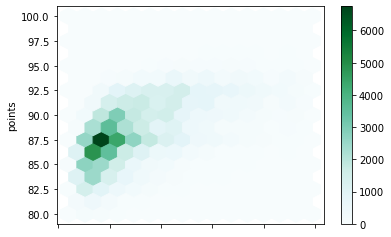

In [47]:
hxg = reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

iš šio grafiko matome, kad dauguma vynų pelno 87.5 taškus, ir jų kaina yra apie 20$.